In [10]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import integrLie as lie
%matplotlib notebook

In [2]:
def spherical2cart(s):
    return np.array([np.cos(s[0])*np.cos(s[1]), np.cos(s[0])*np.sin(s[1]),np.sin(s[0])])

def cart2spherical(y):
    try:
        np.linalg.norm(y) < 1 + 1e-6 or np.linalg.norm(y) > 1 - 1e-6
    except:
        raise Exception('Not on the sphere')
    return np.array([np.arcsin(y[2]), np.arctan2(y[1],y[0])])

def rDistance(y,z):
    # return 2*np.arcsin(np.linalg.norm(y-z,2)/2)
    y = y.reshape(1,3)
    z = z.reshape(3,1)
    return np.arccos(y@z)

def ProjS2(p,q,t):
    return ((1-t)*p+t*q)/np.linalg.norm((1-t)*p+t*q)

In [3]:
def negSkwMatrix(x,D):
    x = x.reshape(3,1)
    f = ((np.eye(3)-x*np.transpose(x))@D)@x
    rslt = f*np.transpose(x)-x*np.transpose(f)
    return rslt

def vecField(x,D,C):
    rslt = (-negSkwMatrix(x,D)+C*lie.skw(x))@x
    return rslt

def energy(x,D):
    return 0.5*np.transpose(x)@D@x

In [70]:
# initialization
I1 = 0.5
I3 = 1.0
if I1 > I3:
    tmp = np.copy(I3)
    I3  = np.copy(I1)
    I1  = np.copy(tmp)
I2      = np.copy(I1)
diag    = np.array([1/I1, 1/I2, 1/I3]).reshape(3,)
Inertia = np.diag(diag)

C       = [0, 2, 5, 10, 20]
C_size  = len(C)

dt      = 0.01
my_time = np.arange(0, 5, dt)
N       = my_time.size

phi0   = -np.pi/2 + np.random.rand()
theta0 = 2*np.pi*np.random.rand()

q = np.zeros((C_size,3,N))
q[0,:,0] = spherical2cart([phi0,theta0])
for j in range(C_size-1):
    q[j+1,:,0] = np.copy(q[0,:,0])

In [71]:
now = datetime.datetime.now().strftime('%Y%m%dT%H%M%S')

for cc, the_c in enumerate(C):
    for cnt in range(N-1):
        q[cc,:,cnt+1] = lie.implieeul(lambda x: lie.skwinv(-negSkwMatrix(x, Inertia)+the_c*lie.skw(x)), q[cc,:,cnt], q[cc,:,cnt], dt)
        
# s = np.save('../out/'+now+'_isotropy_sols',q)

In [72]:
# s = np.load('/Users/ergysc/Documents/GitHub/SphericalPendulum-Secondment/out/20230804T131426_isotropy_sols.npy')

In [73]:
# import numpy as np
# %matplotlib notebook
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from cycler import cycler  # For color cycling

# # Reading solution with different values of C
# s = np.load('/Users/ergysc/Documents/GitHub/SphericalPendulum-Secondment/out/20230804T131426_isotropy_sols.npy')
# n = s.shape

# # Copying (manually) c vector
# C = [0, 2, 5, 10, 20]

# # Generating a list of distinct colors
# colors = plt.cm.tab20(np.linspace(0, 1, n[0] + 2))

# # Apply color cycling for consistent color assignment
# plt.rc('axes', prop_cycle=(cycler('color', colors)))

# # Reproduce graph on the sphere of the solution
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for k in range(n[0]):
#     x = np.reshape(s[k, :, :], (n[1], n[2]))
#     radius = np.sqrt(x[0, 0] ** 2 + x[1, 0] ** 2)
#     ax.plot3D(x[0, :], x[1, :], x[2, :], '-', linewidth=3, label=f'c={C[k]}')

# # Create sphere surface
# xS2, yS2, zS2 = np.meshgrid(np.linspace(-1, 1, 360), np.linspace(-1, 1, 360), np.linspace(-1, 1, 360), indexing='ij')
# small = 360 // 2

# if not full:
#     # Only lower half of the sphere
#     h = ax.plot_surface(xS2[:small, :, 0], yS2[:small, :, 0], zS2[:small, :, 0], facecolors=[plt.cm.bone(0.5)], linewidth=0, antialiased=True)
#     h.set_edgecolor('none')
#     ax.plot(xS2[small, :, 0], yS2[small, :, 0], zS2[small, :, 0], '-k', linewidth=1)
# else:
#     # Complete sphere
#     h = ax.plot_surface(xS2, yS2, zS2, facecolors=[plt.cm.bone(0.1)], linewidth=0, antialiased=True)
#     h.set_edgecolor('none')

# ax.set_box_aspect([1, 1, 1])
# ax.legend(fontsize=18, loc='upper right')

# plt.show()


In [74]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from cycler import cycler

# # Reading solution with different values of C
# s = np.load('/Users/ergysc/Documents/GitHub/SphericalPendulum-Secondment/out/20230804T131426_isotropy_sols.npy')
# n = s.shape

# # Copying (manually) c vector
# C = [0, 2, 5, 10, 20]

# # Generating a list of distinct colors
# colors = plt.cm.tab20(np.linspace(0, 1, n[0] + 2))

# # Apply color cycling for consistent color assignment
# plt.rc('axes', prop_cycle=(cycler('color', colors)))

# # Reproduce graph on the sphere of the solution
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Create sphere surface
# u = np.linspace(0, 2 * np.pi, 100)
# v = np.linspace(0, np.pi, 100)
# xS2 = np.outer(np.cos(u), np.sin(v))
# yS2 = np.outer(np.sin(u), np.sin(v))
# zS2 = np.outer(np.ones(np.size(u)), np.cos(v))

# ax.plot_surface(xS2, yS2, zS2, color='gray', alpha=0.5)

# for k in range(n[0]):
#     x = np.reshape(s[k, :, :], (n[1], n[2]))
#     ax.plot(x[0, :], x[1, :], x[2, :], '-', linewidth=3, color=colors[k, :], label=f'c={C[k]}')

# ax.set_box_aspect([1, 1, 1])
# ax.legend( loc='best')

# plt.show()
# 

<IPython.core.display.Javascript object>


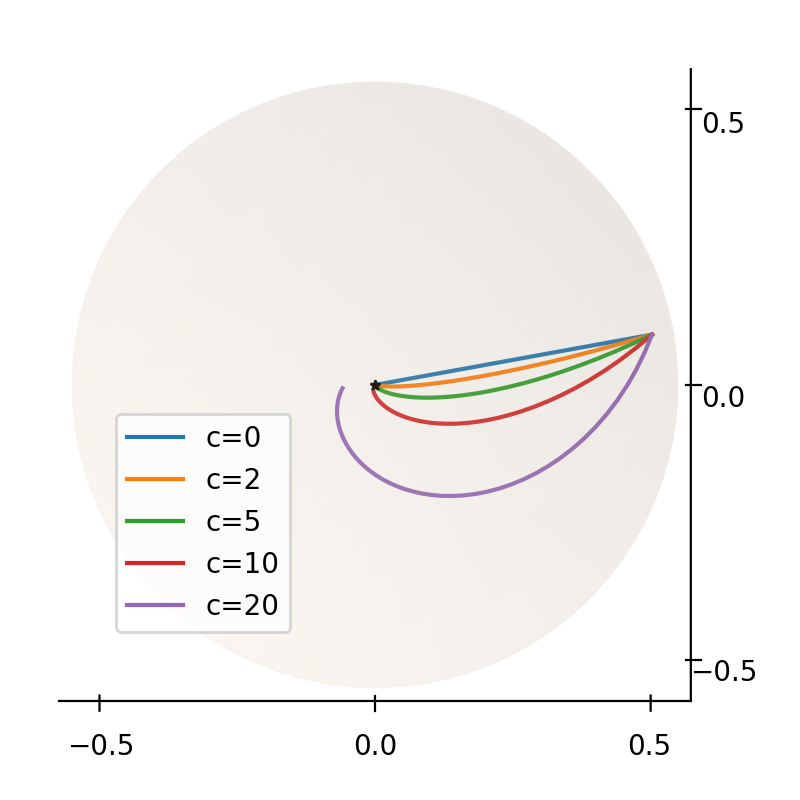

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reading solution with different values of C
s = np.load('/Users/ergysc/Documents/GitHub/SphericalPendulum-Secondment/out/20230804T131426_isotropy_sols.npy')
n = s.shape

# Copying (manually) c vector
C = [0, 2, 5, 10, 20]

# Define your own colors
C0 = '#1f77b4'  # Blue
C1 = '#ff7f0e'  # Orange
C2 = '#2ca02c'  # Green
C3 = '#d62728'  # Red
C4 = '#9467bd'  # Purple

# Reproduce graph on the sphere of the solution
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

# Create sphere surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi/6, 100)
xS2 = np.outer(np.cos(u), np.sin(v))
yS2 = np.outer(np.sin(u), np.sin(v))
zS2 = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(xS2, yS2, zS2, color = 'bisque', alpha=0.2)

# Get rid of the panes                          
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 

# # Get rid of the spines                         
# ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
# ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.set_xticks([-1, -0.5, 0, 0.5, 1])                               
ax.set_yticks([-1, -0.5, 0, 0.5, 1])                               
ax.set_zticks([])
ax.grid(False)
# Plot curves on the surface of the sphere
for k in range(n[0]):
    x = np.reshape(s[k, :, :], (n[1], n[2]))
    ax.plot(x[0, :], x[1, :], x[2, :], '-', color=eval(f'C{k}'), label=f'c={C[k]}')
ax.scatter([0], [0], [-1], color='black', marker='*', s = 10)

ax.set_box_aspect([1, 1, 1])
ax.legend(loc='best', bbox_to_anchor=(0.45, 0.5 ))
fig.subplots_adjust(left=-0.4, right=1.3, bottom=-0.2, top=1.2)
ax.view_init(89.99,270, vertical_axis='z')
plt.show()
plt.savefig('isotropy.pdf')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reading solution with different values of C
s = np.load('/Users/ergysc/Documents/GitHub/SphericalPendulum-Secondment/out/20230804T131426_isotropy_sols.npy')
n = s.shape

# Copying (manually) c vector
C = [0, 2, 5, 10, 20]

# Define your own colors
C0 = '#1f77b4'  # Blue
C1 = '#ff7f0e'  # Orange
C2 = '#2ca02c'  # Green
C3 = '#d62728'  # Red
C4 = '#9467bd'  # Purple

# Create a 2D plot
plt.figure(figsize=(8, 8))

# Plot curves on the surface of the sphere
for k in range(n[0]):
    x = np.reshape(s[k, :, :], (n[1], n[2]))
    plt.plot(x[0, :], x[1, :], '-', color=eval(f'C{k}'), label=f'c={C[k]}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Curves on Sphere Surface')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reading solution with different values of C
s = np.load('/Users/ergysc/Documents/GitHub/SphericalPendulum-Secondment/out/20230804T131426_isotropy_sols.npy')
n = s.shape

# Copying (manually) c vector
C = [0, 2, 5, 10, 20]

# Define your own colors
C0 = '#1f77b4'  # Blue
C1 = '#ff7f0e'  # Orange
C2 = '#2ca02c'  # Green
C3 = '#d62728'  # Red
C4 = '#9467bd'  # Purple

# Create a polar plot
plt.figure(figsize=(4,4))
ax = plt.subplot(111, projection='polar')

# Convert Cartesian coordinates to polar coordinates
def cartesian_to_polar(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

# Plot curves on the polar plot
for k in range(n[0]):
    x = np.reshape(s[k, :, :], (n[1], n[2]))
    rho, phi = cartesian_to_polar(x[0, :], x[1, :])
    ax.plot(phi, rho, '-', color=eval(f'C{k}'), label=f'c={C[k]}')

ax.set_title('Projected Sphere on Polar Plot')
ax.legend(loc='upper left')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reading solution with different values of C
s = np.load('/Users/ergysc/Documents/GitHub/SphericalPendulum-Secondment/out/20230804T131426_isotropy_sols.npy')
n = s.shape

# Copying (manually) c vector
C = [0, 2, 5, 10, 20]

# Define your own colors
C0 = '#1f77b4'  # Blue
C1 = '#ff7f0e'  # Orange
C2 = '#2ca02c'  # Green
C3 = '#d62728'  # Red
C4 = '#9467bd'  # Purple

# Create a polar plot
plt.figure(figsize=(4, 4))
ax = plt.subplot(111, projection='polar')

# Convert Cartesian coordinates to polar coordinates
def cartesian_to_polar(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

# Plot the colored circle
theta = np.linspace(0, 2 * np.pi, 100)
radius = 0.4  # Modify the radius as needed
ax.fill(theta, [radius] * len(theta), color = 'bisque', alpha=0.2)

# Plot curves on the polar plot
for k in range(n[0]):
    x = np.reshape(s[k, :, :], (n[1], n[2]))
    rho, phi = cartesian_to_polar(x[0, :], x[1, :])
    ax.plot(phi, rho, '-', color=eval(f'C{k}'), label=f'c={C[k]}')

ax.set_title('Projected Sphere on Polar Plot')
ax.legend(loc='upper left')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Reading solution with different values of C
s = np.load('/Users/ergysc/Documents/GitHub/SphericalPendulum-Secondment/out/20230804T131426_isotropy_sols.npy')
n = s.shape

# Copying (manually) c vector
C = [0, 2, 5, 10, 20]

# Define your own colors
C0 = '#1f77b4'  # Blue
C1 = '#ff7f0e'  # Orange
C2 = '#2ca02c'  # Green
C3 = '#d62728'  # Red
C4 = '#9467bd'  # Purple

# Create a 2D plot
plt.figure(figsize=(8, 8))

# Plot curves projected on the x-y plane
for k in range(n[0]):
    x = np.reshape(s[k, :, :], (n[1], n[2]))
    plt.plot(x[0, :], x[1, :], '-', color=eval(f'C{k}'), label=f'c={C[k]}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Sphere Projected onto 2D Plane')
plt.legend(loc='best')
plt.grid(True)
plt.axis('equal')
plt.show()
